<a href="https://colab.research.google.com/github/annabeltramini/test/blob/main/MY_WORKING_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold


from tensorflow.keras.layers import Flatten

import time

In [3]:
# load dataset
#Broken into 10,000 vs 60,000 images
(train_img, train_lab), (test_img, test_lab) = mnist.load_data()
size_train = train_img.shape[0]
size_test = test_img.shape[0]
train_img = train_img.reshape((size_train, 28, 28, 1))
test_img = test_img.reshape((size_test, 28, 28, 1))

#Encode the labels as binary vectors
train_lab = to_categorical(train_lab)
test_lab = to_categorical(test_lab)

#Normalise the pixels between 0 and 1
#Do I want to try and normalise it like the paper?
#Normalise pixels
train_img = train_img.astype(np.float32)
train_img = (train_img/255)
test_img = test_img.astype(np.float32)
test_img = (test_img/255)

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
#Create the model:
model = Sequential() #backbone
#C1: First convolutional layer (as loyal as possible to LeCun)
model.add(Conv2D(filters = 6, kernel_size = (5,5), input_shape = (28,28,1), activation = 'sigmoid', padding = 'same'))
#S2: First subsampling layer (MaxPooling instead of sigmoidal calculation, to make it more modern, but same size)
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
#C3: Second convolutional layer (Easy on the complicated connections)
model.add(Conv2D(filters = 16, kernel_size = (5,5),input_shape=(14, 14, 6), activation = "sigmoid"))
#S4
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
#C5
model.add(Conv2D(filters = 120, kernel_size = (5,5), input_shape = (5,5,16), activation = "sigmoid"))
#F5 (I need to flatten to be able to give the dense leyaers)
model.add(Flatten())
#F6
model.add(Dense(84,activation = "sigmoid"))
#Output (They use gaussian)
model.add(Dense(10,activation = "softmax"))

In [5]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(train_img, train_lab, epochs=10, batch_size=32, validation_data=(test_img, test_lab))

Epoch 1/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0322 - accuracy: 0.9904 - val_loss: 0.0403 - val_accuracy: 0.9873
Epoch 2/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0313 - accuracy: 0.9908 - val_loss: 0.0403 - val_accuracy: 0.9869
Epoch 3/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0298 - accuracy: 0.9910 - val_loss: 0.0376 - val_accuracy: 0.9879
Epoch 4/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0286 - accuracy: 0.9917 - val_loss: 0.0374 - val_accuracy: 0.9864
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0276 - accuracy: 0.9920 - val_loss: 0.0405 - val_accuracy: 0.9871
Epoch 6/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0266 - accuracy: 0.9920 - val_loss: 0.0394 - val_accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0260 - accuracy: 0.9925 - val_loss: 0.0377 -

In [22]:
history.history

{'loss': [0.03223267197608948,
  0.03131156787276268,
  0.029802929610013962,
  0.02860097400844097,
  0.027643591165542603,
  0.026574168354272842,
  0.026016779243946075,
  0.024579862132668495,
  0.024183498695492744,
  0.0233016274869442],
 'accuracy': [0.9903833270072937,
  0.9907500147819519,
  0.9910333156585693,
  0.9916666746139526,
  0.9920499920845032,
  0.9919833540916443,
  0.9924833178520203,
  0.9929166436195374,
  0.9928833246231079,
  0.9933000206947327],
 'val_loss': [0.040296800434589386,
  0.04026186093688011,
  0.03756058216094971,
  0.037365496158599854,
  0.040479838848114014,
  0.03937569633126259,
  0.03774619102478027,
  0.03606133535504341,
  0.03581804409623146,
  0.03584278002381325],
 'val_accuracy': [0.9872999787330627,
  0.9868999719619751,
  0.9879000186920166,
  0.9864000082015991,
  0.9871000051498413,
  0.9869999885559082,
  0.9872999787330627,
  0.988099992275238,
  0.9876999855041504,
  0.9883000254631042]}

In [23]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(test_img, test_lab, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(test_img[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
79/79 [==============================] - 3s 33ms/step - loss: 0.0358 - accuracy: 0.9883
test loss, test acc: [0.035842765122652054, 0.9883000254631042]
Generate predictions for 3 samples
1/1 [==============================] - 0s 38ms/step
predictions shape: (3, 10)


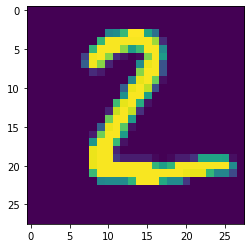

1/1 [==============================] - 0s 25ms/step
The CNN thinks this number is a 2


In [24]:
img = test_img[1]
plt.imshow(img.reshape(28,28))
plt.show()
#img
#model.predict(img.reshape(1,28,28,1))
print("The CNN thinks this number is a", np.argmax(model.predict(img.reshape(1,28,28,1))))

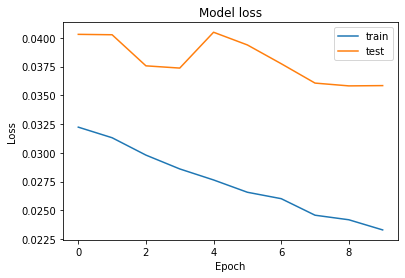

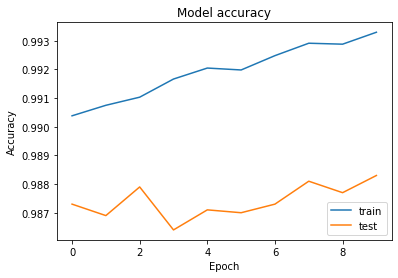

In [25]:
#CODE FROM J
# Plot the training and test loss and accuracy 
plt.plot(history.history["loss"]) 
plt.plot(history.history["val_loss"]) 
plt.title("Model loss") 
plt.ylabel("Loss") 
plt.xlabel("Epoch")
plt.legend(["train", "test"], loc="upper right") 
plt.show()

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"]) 
plt.title("Model accuracy") 
plt.ylabel("Accuracy") 
plt.xlabel("Epoch")
plt.legend(["train", "test"], loc="lower right")
plt.show()

In [165]:
#CODE FROM  MAHCINE LEARNING MASTERY
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		#model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=5, batch_size=32, validation_data=(testX, testY), verbose=1)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

scores, histories = evaluate_model(train_img,train_lab,10)

Epoch 1/5
1688/1688 [==============================] - 52s 31ms/step - loss: 0.0128 - accuracy: 0.9966 - val_loss: 0.0206 - val_accuracy: 0.9933
Epoch 2/5
1688/1688 [==============================] - 43s 26ms/step - loss: 0.0119 - accuracy: 0.9972 - val_loss: 0.0185 - val_accuracy: 0.9945
Epoch 3/5
1688/1688 [==============================] - 46s 27ms/step - loss: 0.0116 - accuracy: 0.9972 - val_loss: 0.0187 - val_accuracy: 0.9937
Epoch 4/5
1688/1688 [==============================] - 43s 26ms/step - loss: 0.0111 - accuracy: 0.9973 - val_loss: 0.0182 - val_accuracy: 0.9943
Epoch 5/5
1688/1688 [==============================] - 43s 26ms/step - loss: 0.0108 - accuracy: 0.9977 - val_loss: 0.0200 - val_accuracy: 0.9933
> 99.333
Epoch 1/5
1688/1688 [==============================] - 44s 26ms/step - loss: 0.0113 - accuracy: 0.9971 - val_loss: 0.0137 - val_accuracy: 0.9968
Epoch 2/5
1688/1688 [==============================] - 43s 26ms/step - loss: 0.0107 - accuracy: 0.9974 - val_loss: 0.0164

<ipython-input-166-7de6367e8ffd>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 1, 1)
<ipython-input-166-7de6367e8ffd>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 1, 2)


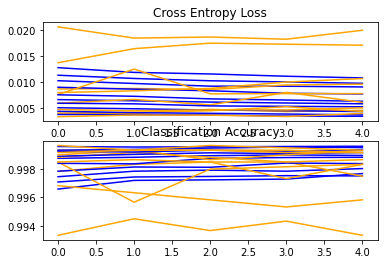

In [166]:
#CODE FROM  MAHCINE LEARNING MASTERY
# plot diagnostic learning curves

for i in range(len(histories)):
		# plot loss
	plt.subplot(2, 1, 1)
	plt.title('Cross Entropy Loss')
	plt.plot(histories[i].history['loss'], color='blue', label='train')
	plt.plot(histories[i].history['val_loss'], color='orange', label='test')
  #print(histories[i].history['loss'])
		# plot accuracy
	plt.subplot(2, 1, 2)
	plt.title('Classification Accuracy')
	plt.plot(histories[i].history['accuracy'], color='blue', label='train')
	plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
plt.show()

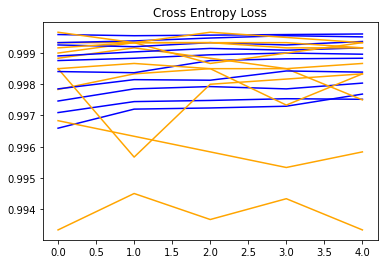

In [173]:
for i in range(len(histories)):
  plt.title('Cross Entropy Loss')
  plt.plot(histories[i].history['accuracy'], color='blue', label='train')
  plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
plt.show()

In [45]:
for i in range(len(histories)):
  print(histories[i].history['loss'])

[0.03223267197608948, 0.03131156787276268, 0.029802929610013962, 0.02860097400844097, 0.027643591165542603, 0.026574168354272842, 0.026016779243946075, 0.024579862132668495, 0.024183498695492744, 0.0233016274869442]
[0.03223267197608948, 0.03131156787276268, 0.029802929610013962, 0.02860097400844097, 0.027643591165542603, 0.026574168354272842, 0.026016779243946075, 0.024579862132668495, 0.024183498695492744, 0.0233016274869442]
[0.03223267197608948, 0.03131156787276268, 0.029802929610013962, 0.02860097400844097, 0.027643591165542603, 0.026574168354272842, 0.026016779243946075, 0.024579862132668495, 0.024183498695492744, 0.0233016274869442]
[0.03223267197608948, 0.03131156787276268, 0.029802929610013962, 0.02860097400844097, 0.027643591165542603, 0.026574168354272842, 0.026016779243946075, 0.024579862132668495, 0.024183498695492744, 0.0233016274869442]
[0.03223267197608948, 0.03131156787276268, 0.029802929610013962, 0.02860097400844097, 0.027643591165542603, 0.026574168354272842, 0.0260

In [50]:
model.layers

First Conv Layer
(5, 5, 1, 6)


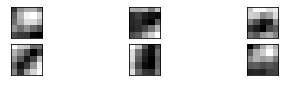

Second Conv Layer
(5, 5, 6, 16)


Third Conv Layer
(5, 5, 16, 120)


In [81]:
filters, biases = model.layers[0].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

#print(len(filters))
#print(filters)

print("First Conv Layer")
print(filters.shape)



# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
 # get the filter
 f = filters[:, :, :, i]
 # plot each channel separately
 for j in range(1):
 # specify subplot and turn of axis
  ax = plt.subplot(n_filters, 3, ix)
  ax.set_xticks([])
  ax.set_yticks([])
 # plot filter channel in grayscale
  plt.imshow(f[:, :, j], cmap='gray')
  ix += 1
# show the figure
plt.show()

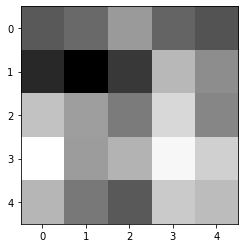

In [91]:
f = filters[:, :, :, 0]
plt.imshow(f[:, :, 0], cmap='gray')
plt.show()

Second Conv Layer
(5, 5, 6, 16)


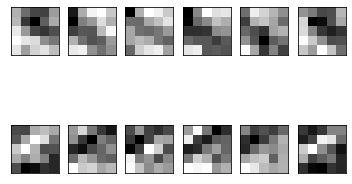

In [117]:
print("Second Conv Layer")
filters, biases = model.layers[2].get_weights()

f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

#print(len(filters))
print(filters.shape)
#print(filters)

# plot first few filters
n_filters, ix = 2, 1 #up tp 16
for i in range(n_filters):
 # get the filter
 f = filters[:, :, :, i]
 # plot each channel separately
 for j in range(6):
 # specify subplot and turn of axis
  ax = plt.subplot(n_filters, 6, ix)
  ax.set_xticks([])
  ax.set_yticks([])
 # plot filter channel in grayscale
  plt.imshow(f[:, :, j], cmap='gray')
  ix += 1
# show the figure
plt.show()

Third Conv Layer
(5, 5, 16, 120)


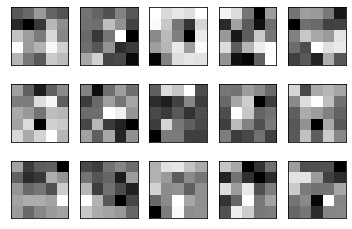

In [118]:
print("Third Conv Layer")
filters, biases = model.layers[4].get_weights()

f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

#print(len(filters))
print(filters.shape)
#print(filters)

# plot first few filters
n_filters, ix = 3, 1 #up to 120,1
for i in range(n_filters):
 # get the filter
 f = filters[:, :, :, i]
 # plot each channel separately
 for j in range(5): #up to 16
 # specify subplot and turn of axis
  ax = plt.subplot(n_filters, 5, ix) #up to 16
  ax.set_xticks([])
  ax.set_yticks([])
 # plot filter channel in grayscale
  plt.imshow(f[:, :, j], cmap='gray')
  ix += 1
# show the figure
plt.show()

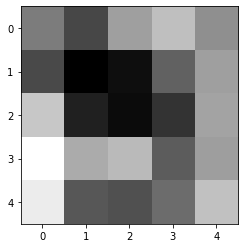

In [89]:
f = filters[:, :, :, 119]
plt.imshow(f[:, :, 0], cmap='gray')
plt.show()

In [90]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [99]:
#GET INFO ON THE WEIGHTS
for layer in model.layers:
 # check for convolutional layer
 if 'conv' not in layer.name:
  continue
  # get filter weights
 filters, biases = layer.get_weights()
 print(layer.name, filters.shape) 



conv2d (5, 5, 1, 6)
conv2d_1 (5, 5, 6, 16)
conv2d_2 (5, 5, 16, 120)


In [142]:
# summarize feature map shapes
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	#if 'conv' not in layer.name:
		#continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

0 conv2d (None, 28, 28, 6)
1 max_pooling2d (None, 14, 14, 6)
2 conv2d_1 (None, 10, 10, 16)
3 max_pooling2d_1 (None, 5, 5, 16)
4 conv2d_2 (None, 1, 1, 120)
5 flatten (None, 120)
6 dense (None, 84)
7 dense_1 (None, 10)


[<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>]
Model: "model_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
Total params: 156
Trainable params: 156
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 45ms/step
(1, 28, 28, 6)


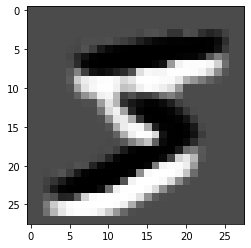

1/1 [==============================] - 0s 49ms/step


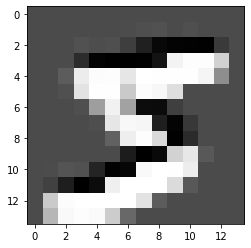

1/1 [==============================] - 0s 57ms/step


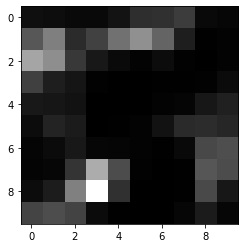

1/1 [==============================] - 0s 58ms/step


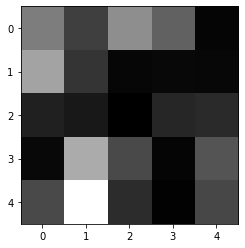

In [150]:
##PLOTTING THE SAME FEATURE MAP ACROSS THE CNN
from keras.models import Model

print(model.inputs)

img = np.expand_dims(train_img[0], axis=0)
img1 = np.expand_dims(train_img[1], axis=0)
img2 = np.expand_dims(train_img[2], axis=0)

# redefine model to output right after the first hidden layer
model2 = Model(inputs=model.inputs, outputs=model.layers[0].output)
model_pooling = Model(inputs=model.inputs, outputs=model.layers[1].output)
model_conv2 = Model(inputs=model.inputs, outputs=model.layers[2].output)
model_conv3 = Model(inputs=model.inputs, outputs=model.layers[3].output)
model2.summary()

feature_maps = model2.predict(img)
print(feature_maps.shape)

plt.imshow(feature_maps[0,:,:,2], cmap = "gray")
plt.show()
#plt.imshow(feature_maps[0,:,:,1], cmap = "gray")
#plt.show()

feature_maps = model_pooling.predict(img)
plt.imshow(feature_maps[0,:,:,2], cmap = "gray")
plt.show()
#plt.imshow(feature_maps[0,:,:,1], cmap = "gray")
#plt.show()

feature_maps = model_conv2.predict(img)
plt.imshow(feature_maps[0,:,:,2], cmap = "gray")
plt.show()
#plt.imshow(feature_maps[0,:,:,1], cmap = "gray")
#plt.show()

feature_maps = model_conv3.predict(img)
plt.imshow(feature_maps[0,:,:,2], cmap = "gray")
plt.show()

[<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>]
1/1 [==============================] - 0s 73ms/step
(1, 28, 28, 6)


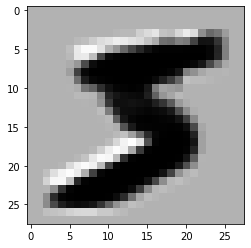

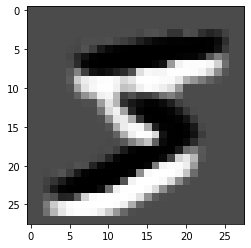

1/1 [==============================] - 0s 62ms/step


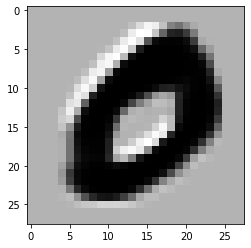

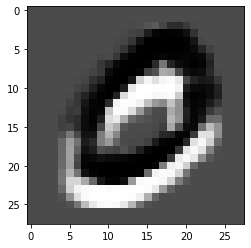

1/1 [==============================] - 0s 27ms/step


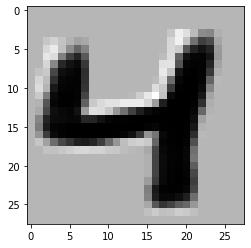

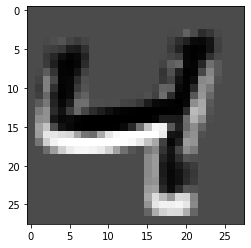

In [158]:
###PLOTTING THE SAME LAYER
#ACROSS DIFFERENT NUMBERS
from keras.models import Model

print(model.inputs)

img = np.expand_dims(train_img[0], axis=0)
img1 = np.expand_dims(train_img[1], axis=0)
img2 = np.expand_dims(train_img[2], axis=0)

# redefine model to output right after the first hidden layer
model2 = Model(inputs=model.inputs, outputs=model.layers[0].output)

feature_maps = model2.predict(img)
print(feature_maps.shape)

plt.imshow(feature_maps[0,:,:,1], cmap = "gray")
plt.show()
plt.imshow(feature_maps[0,:,:,2], cmap = "gray")
plt.show()

feature_maps = model2.predict(img1)
plt.imshow(feature_maps[0,:,:,1], cmap = "gray")
plt.show()
plt.imshow(feature_maps[0,:,:,2], cmap = "gray")
plt.show()

feature_maps = model2.predict(img2)
#plt.imshow(train_img[2].reshape(28,28), cmap = "gray")
plt.show()
plt.imshow(feature_maps[0,:,:,1], cmap = "gray")
plt.show()
plt.imshow(feature_maps[0,:,:,2], cmap = "gray")
plt.show()



# TRADITIONAL SEQUENTIAL NEURAL NETWORK

In [164]:
tradnn = Sequential()
tradnn.add(Flatten(input_shape = (28,28,1)))
tradnn.add(Dense(120, activation = "sigmoid"))
tradnn.add(Dense(10,activation = "softmax"))

tradnn.compile(optimizer = "SGD", loss = 'categorical_crossentropy',metrics=['accuracy'])

#tradnn.fit(train_img, train_lab, epochs = 5, batch_size = 32)

history2 = tradnn.fit(train_img,train_lab,validation_data=(test_img,test_lab),epochs = 15, batch_size = 32)

Epoch 1/15
1875/1875 [==============================] - 7s 4ms/step - loss: 1.4807 - accuracy: 0.6905 - val_loss: 0.8904 - val_accuracy: 0.8286
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7129 - accuracy: 0.8466 - val_loss: 0.5672 - val_accuracy: 0.8739
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5253 - accuracy: 0.8734 - val_loss: 0.4593 - val_accuracy: 0.8873
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4480 - accuracy: 0.8857 - val_loss: 0.4056 - val_accuracy: 0.8939
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4054 - accuracy: 0.8922 - val_loss: 0.3730 - val_accuracy: 0.9024
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3781 - accuracy: 0.8975 - val_loss: 0.3517 - val_accuracy: 0.9064
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3586 - accuracy: 0.9007 - val_loss: 0.3364 - val_accuracy:

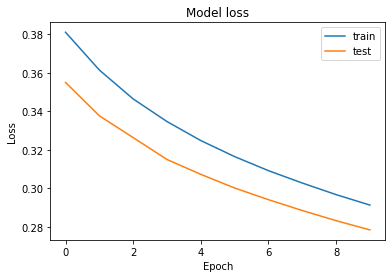

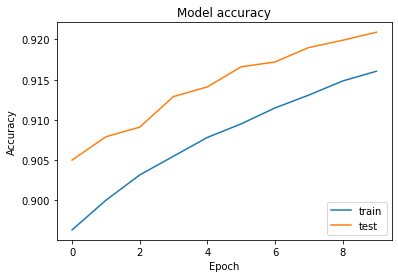

In [160]:
#CODE FROM J
# Plot the training and test loss and accuracy 
plt.plot(history2.history["loss"]) 
plt.plot(history2.history["val_loss"]) 
plt.title("Model loss") 
plt.ylabel("Loss") 
plt.xlabel("Epoch")
plt.legend(["train", "test"], loc="upper right") 
plt.show()

plt.plot(history2.history["accuracy"])
plt.plot(history2.history["val_accuracy"]) 
plt.title("Model accuracy") 
plt.ylabel("Accuracy") 
plt.xlabel("Epoch")
plt.legend(["train", "test"], loc="lower right")
plt.show()